# Chest X-Ray Images (Pneumonia)

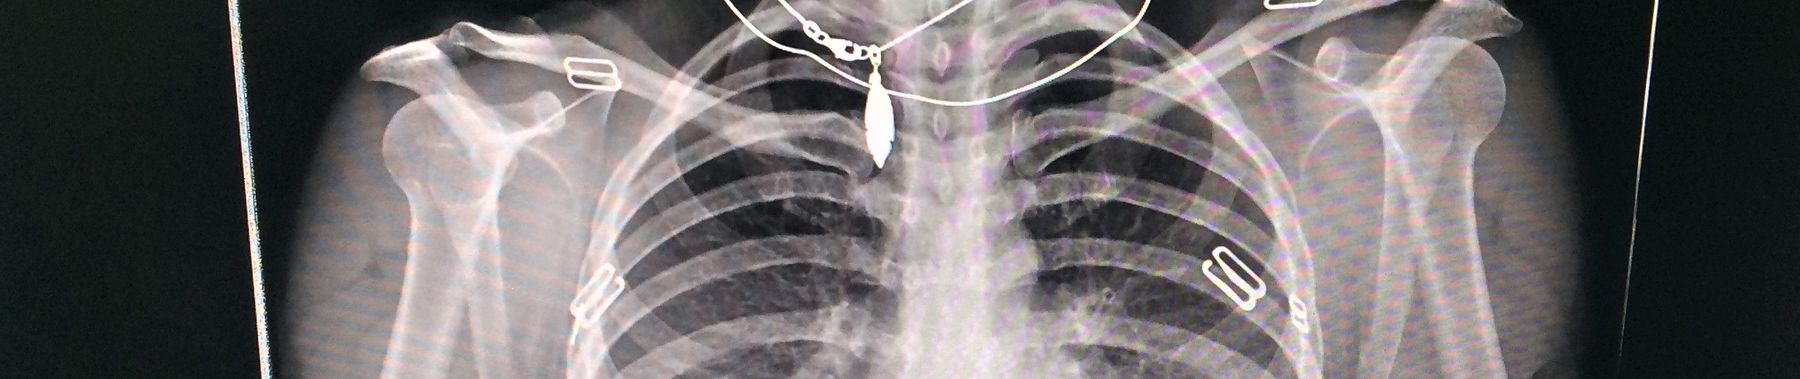

Kacey Clougher, Rachel Goldstein, Irwin Lam, and Kendall McNeil

DESCRIPTION:

OBJECTIVE:

DEFINING KEY TERMS:

METHODOLOGY:

# 1. Loading In and Exploring the Data

In [146]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
import numpy as np
import os
import tensorflow as tf

First, we need to create our directory paths to input into our image generators.
Then we need to create the datasets.

In [148]:
cd Pneumonia X Rays

C:\Users\Jackson\Documents\flatiron\Pneumonia X Rays


In [149]:
ls

 Volume in drive C is OS
 Volume Serial Number is 8EF7-A13E

 Directory of C:\Users\Jackson\Documents\flatiron\Pneumonia X Rays

10/23/2023  10:21 AM    <DIR>          .
10/23/2023  10:10 AM    <DIR>          ..
10/23/2023  03:23 PM    <DIR>          Chest-X-Rays-Pneumonia
10/23/2023  10:21 AM    <DIR>          data
               0 File(s)              0 bytes
               4 Dir(s)  10,233,196,544 bytes free


In [209]:
# Directory paths for train, test, and val
train_path = r'data\archive (3)\chest_xray\train'
test_path = r'data\archive (3)\chest_xray\test'
val_path = r'data\archive (3)\chest_xray\val'

# Import the train directory data, which includes both normal and pneumonia (5216 total) and reshape them
train_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
        train_path, 
        target_size=(64, 64), batch_size=5216)

# Import the test directory data, which includes both normal and pneumonia (624 total) and reshape them
test_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
        test_path, 
        target_size=(64, 64), batch_size=624)

# Import the val directory data, which includes both normal and pneumonia (8 each - 16 total) and reshape them
val_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
        val_path, 
        target_size=(64, 64), batch_size=16)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [172]:
train_images.shape

(5216, 64, 64, 3)

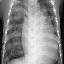

In [173]:
array_to_img(train_images[0])

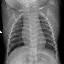

In [174]:
array_to_img(train_images[4])

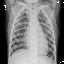

In [175]:
array_to_img(test_images[0])

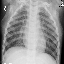

In [176]:
array_to_img(test_images[4])

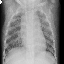

In [177]:
array_to_img(val_images[0])

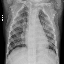

In [178]:
array_to_img(val_images[4])

In [179]:
train_images.shape, test_images.shape, val_images.shape

((5216, 64, 64, 3), (624, 64, 64, 3), (16, 64, 64, 3))

In [180]:
train_images.shape[0]

5216

In [181]:
train_n = train_images.shape[0]
test_n = test_images.shape[0]
val_n = val_images.shape[0]

In [182]:
# Reshape the train images 
train_img_unrow = train_images.reshape(train_n, -1).T

In [183]:
train_img_unrow

array([[0.36078432, 0.23529413, 0.        , ..., 0.25490198, 0.14117648,
        0.        ],
       [0.36078432, 0.23529413, 0.        , ..., 0.25490198, 0.14117648,
        0.        ],
       [0.36078432, 0.23529413, 0.        , ..., 0.25490198, 0.14117648,
        0.        ],
       ...,
       [0.00392157, 0.16470589, 0.        , ..., 0.1137255 , 0.08627451,
        0.        ],
       [0.00392157, 0.16470589, 0.        , ..., 0.1137255 , 0.08627451,
        0.        ],
       [0.00392157, 0.16470589, 0.        , ..., 0.1137255 , 0.08627451,
        0.        ]], dtype=float32)

In [184]:
# Reshape the test images 
test_img_unrow = test_images.reshape(test_n, -1).T

In [164]:
test_img_unrow

array([[ 0.,  0., 61., ...,  4., 28., 85.],
       [ 0.,  0., 61., ...,  4., 28., 85.],
       [ 0.,  0., 61., ...,  4., 28., 85.],
       ...,
       [ 0.,  0., 23., ...,  0.,  0., 20.],
       [ 0.,  0., 23., ...,  0.,  0., 20.],
       [ 0.,  0., 23., ...,  0.,  0., 20.]], dtype=float32)

In [165]:
# Reshape the val images 
val_img_unrow = val_images.reshape(val_n, -1).T

In [166]:
val_img_unrow

array([[ 0.,  0., 62., ...,  0.,  0.,  1.],
       [ 0.,  0., 62., ...,  0.,  0.,  1.],
       [ 0.,  0., 62., ...,  0.,  0.,  1.],
       ...,
       [ 2.,  2.,  7., ...,  0.,  0.,  3.],
       [ 2.,  2.,  7., ...,  0.,  0.,  3.],
       [ 2.,  2.,  7., ...,  0.,  0.,  3.]], dtype=float32)

Let's check on our target variable.

In [167]:
train_labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [168]:
train_generator.class_indices 

{'NORMAL': 0, 'PNEUMONIA': 1}

Interpretation: 0 represents a normal x-ray with no pneumonia. 1 represents an x-ray of a chest with pneumonia.

In [24]:
train_labels_final = train_labels.T[[1]]

In [25]:
np.shape(train_labels_final) 

(1, 5216)

In [26]:
test_labels_final = test_labels.T[[1]]

In [27]:
np.shape(test_labels_final) 

(1, 624)

In [28]:
val_labels_final = val_labels.T[[1]]

In [29]:
np.shape(val_labels_final) 

(1, 16)

Let's checkout a chest x-ray with pneumonia as a sanity check.

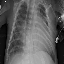

In [34]:
array_to_img(train_images[240])

In [35]:
train_labels_final[:,240]

array([1.], dtype=float32)

Let's checkout a chest x-ray without pneumonia as a sanity check.

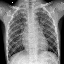

In [32]:
array_to_img(train_images[1500])

In [33]:
train_labels_final[:,1500]

array([0.], dtype=float32)

# 2. Standardize the Data

In [169]:
from keras.datasets import mnist
(train_images, train_labels_final), (test_images, test_labels_final) = mnist.load_data()
# check out pixel values
print('Train', train_images.min(), train_images.max(), train_images.mean(), train_images.std())
print('Test', test_images.min(), test_images.max(), test_images.mean(), test_images.std())

Train 0 255 33.318421449829934 78.56748998339798
Test 0 255 33.791224489795916 79.17246322228644


Each image takes a value between 0 and 255 so to standardize the data, we will divide by 255. 

In [89]:
train_img_unrow

array([[  4.,  61., 132., ...,  45.,   0.,  30.],
       [  4.,  61., 132., ...,  45.,   0.,  30.],
       [  4.,  61., 132., ...,  45.,   0.,  30.],
       ...,
       [ 11.,  10.,  47., ...,  12.,  29.,  24.],
       [ 11.,  10.,  47., ...,  12.,  29.,  24.],
       [ 11.,  10.,  47., ...,  12.,  29.,  24.]], dtype=float32)

In [140]:
#train_images = train_img_unrow/255
#test_images = test_img_unrow/255
#val_images = test_img_unrow/255

# 3. Explore Models

In [185]:
from keras import models
from keras import layers
from keras import optimizers

In [186]:
train_images.shape

(5216, 64, 64, 3)

In [187]:
train_images.shape

(5216, 64, 64, 3)

In [213]:
train_labels.shape

(5216, 2)

In [188]:
train_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [218]:
first_model = models.Sequential()
first_model.add(layers.Dense(10, activation='relu', input_shape=(64, 64, 3)))
first_model.add(layers.Flatten())
first_model.add(layers.Dense(2, activation='softmax'))

In [237]:
first_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [221]:
first_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 64, 64, 10)        40        
                                                                 
 flatten_13 (Flatten)        (None, 40960)             0         
                                                                 
 dense_51 (Dense)            (None, 2)                 81922     
                                                                 
Total params: 81962 (320.16 KB)
Trainable params: 81962 (320.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [222]:
first_model.fit(train_images,
                    train_labels,
                    epochs=100,
                    batch_size=64)

Epoch 1/100
82/82 [==============================] - 5s 35ms/step - loss: 0.4036 - accuracy: 0.8480
Epoch 2/100
82/82 [==============================] - 3s 34ms/step - loss: 0.1898 - accuracy: 0.9248
Epoch 3/100
82/82 [==============================] - 3s 36ms/step - loss: 0.1552 - accuracy: 0.9390
Epoch 4/100
82/82 [==============================] - 3s 34ms/step - loss: 0.1349 - accuracy: 0.9488
Epoch 5/100
82/82 [==============================] - 3s 32ms/step - loss: 0.1261 - accuracy: 0.9528
Epoch 6/100
82/82 [==============================] - 3s 34ms/step - loss: 0.1181 - accuracy: 0.9538
Epoch 7/100
82/82 [==============================] - 3s 34ms/step - loss: 0.1051 - accuracy: 0.9611
Epoch 8/100
82/82 [==============================] - 3s 33ms/step - loss: 0.1190 - accuracy: 0.9549
Epoch 9/100
82/82 [==============================] - 3s 34ms/step - loss: 0.1256 - accuracy: 0.9525
Epoch 10/100
82/82 [==============================] - 3s 37ms/step - loss: 0.1211 - accuracy: 0.9567

82/82 [==============================] - 2s 29ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 83/100
82/82 [==============================] - 2s 29ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 84/100
82/82 [==============================] - 2s 28ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 85/100
82/82 [==============================] - 3s 31ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 86/100
82/82 [==============================] - 3s 33ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 87/100
82/82 [==============================] - 3s 34ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 88/100
82/82 [==============================] - 3s 33ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 89/100
82/82 [==============================] - 3s 35ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 90/100
82/82 [==============================] - 3s 32ms/step - loss: 9.6140e-04 - accuracy: 1.0000
Epoch 91/100
82/82 [==============================] - 3s 31ms/step - loss: 0.0010 - accuracy: 1.0000

In [234]:
second_model = models.Sequential()
second_model.add(layers.Dense(10, activation='sigmoid', input_shape=(64, 64, 3)))
second_model.add(layers.Flatten())
second_model.add(layers.Dense(1, activation='sigmoid'))

In [235]:
second_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [236]:
second_model.fit(train_images,
                    train_labels,
                    epochs=100,
                    batch_size=64)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\Jackson\anaconda\anaconda-this one\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Jackson\anaconda\anaconda-this one\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Jackson\anaconda\anaconda-this one\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Jackson\anaconda\anaconda-this one\Lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Jackson\anaconda\anaconda-this one\Lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Jackson\anaconda\anaconda-this one\Lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Jackson\anaconda\anaconda-this one\Lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Jackson\anaconda\anaconda-this one\Lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Jackson\anaconda\anaconda-this one\Lib\site-packages\keras\src\losses.py", line 2432, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\Jackson\anaconda\anaconda-this one\Lib\site-packages\keras\src\backend.py", line 5809, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1) vs (None, 2)).
